In [2]:
import pandas as pd

df=pd.read_csv('df_merged_final.txt')
df.head()

/var/folders/wr/mjhbx04x7wl_1q0j11g4m9c80000gn/T/ipykernel_25863/193862151.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('df_merged_final.txt')


,REPORT_ID,DATRECEIVED,GENDER_FR,AGE_Y,WEIGHT,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_FR,SERIOUSNESS_FR,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,DRUGNAME,INDICATION_NAME_FR,PT_NAME_FR,SOC_NAME_FR
0,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congÃ©nitales, familiales et gÃ©nÃ©..."
1,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Ventricule cÃ©rÃ©bral dilatÃ©,Affections du systÃ¨me nerveux
2,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysplasie septo-optique,"Affections congÃ©nitales, familiales et gÃ©nÃ©..."
3,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,HoloprosencÃ©phalie,"Affections congÃ©nitales, familiales et gÃ©nÃ©..."
4,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congÃ©nitales, familiales et gÃ©nÃ©..."


In [3]:
mapping = {'Masculin': 1, 'Féminin': 2}

# Utiliser la méthode map pour appliquer le mapping à la colonne 'sexe'
df['GENDER_FR_encoded'] = df['GENDER_FR'].map(mapping)
df.head()

,REPORT_ID,DATRECEIVED,GENDER_FR,AGE_Y,WEIGHT,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_FR,SERIOUSNESS_FR,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,DRUGNAME,INDICATION_NAME_FR,PT_NAME_FR,SOC_NAME_FR,GENDER_FR_encoded
0,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0
1,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Ventricule cÃ©rÃ©bral dilatÃ©,Affections du systÃ¨me nerveux,2.0
2,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysplasie septo-optique,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0
3,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,HoloprosencÃ©phalie,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0
4,120066,09-NOV-98,Féminin,0.073,8.2,Kilogramme,68.0,Centimètres,Grave,NaN,NaN,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0


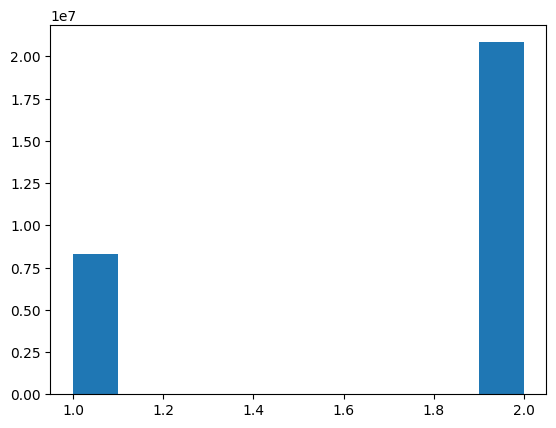

In [4]:
import matplotlib.pyplot as plt 

plt.hist( df['GENDER_FR_encoded'])
plt.show()

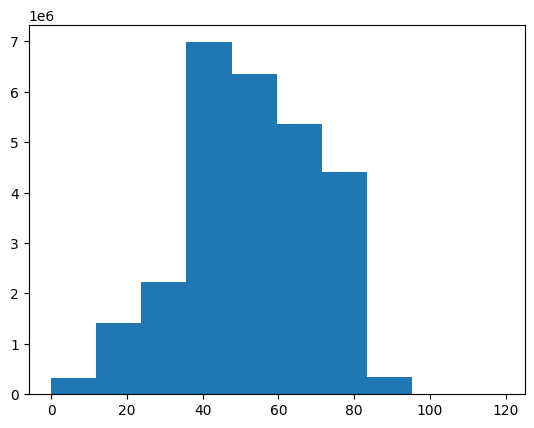

In [5]:
plt.hist( df['AGE_Y'])
plt.show()

In [6]:
colonne_a_consulter = df['WEIGHT_UNIT_FR']

# Enlever les doublons de la colonne
valeurs_uniques = colonne_a_consulter.drop_duplicates()
valeurs_uniques

0         Kilogramme
45               NaN
479             Once
2219           Livre
288233       Inconnu
Name: WEIGHT_UNIT_FR, dtype: object

In [7]:
nombre_inconnu = (df['WEIGHT_UNIT_FR'] == 'Inconnu').sum()
nombre_inconnu

90

In [8]:
def oz_to_kg(ounces):
    return ounces / 35.27396
def lbs_to_kg(pounds):
    return pounds * 0.453592
import numpy as np
# Parcours du dataframe
# Appliquer les conversions de manière vectorisée en utilisant la fonction apply
df['WEIGHT'] = df.apply(lambda row: oz_to_kg(row['WEIGHT']) if row['WEIGHT_UNIT_FR'] == 'once' else (lbs_to_kg(row['WEIGHT']) if row['WEIGHT_UNIT_FR'] == 'livre' else np.nan), axis=1)

# Remplacer les valeurs 'inconnu' par NaN dans la colonne 'WEIGHT'
df.loc[df['WEIGHT_UNIT_FR'] == 'inconnu', 'WEIGHT'] = np.nan

In [9]:
colonne_a_consulter = df['HEIGHT_UNIT_FR']

# Enlever les doublons de la colonne
valeurs_uniques = colonne_a_consulter.drop_duplicates()
valeurs_uniques

0      Centimètres
45             NaN
479          Pouce
Name: HEIGHT_UNIT_FR, dtype: object

In [10]:
def in_to_cm(inches):
    return inches * 2.54

df['HEIGHT'] = df.apply(lambda row: in_to_cm(row['HEIGHT']) if row['HEIGHT_UNIT_FR'] == 'pouce' else row['HEIGHT'], axis=1)


In [11]:
colonne_a_consulter = df['SERIOUSNESS_FR']

# Enlever les doublons de la colonne
valeurs_uniques = colonne_a_consulter.drop_duplicates()
valeurs_uniques

0           Grave
1443    Non grave
Name: SERIOUSNESS_FR, dtype: object

In [12]:
mapping = {'Grave': 1, 'Non grave': 2}

# Utiliser la méthode map pour appliquer le mapping à la colonne 'sexe'
df['SERIOUSNESS_FR_encoded'] = df['SERIOUSNESS_FR'].map(mapping)
df.head()

,REPORT_ID,DATRECEIVED,GENDER_FR,AGE_Y,WEIGHT,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_FR,SERIOUSNESS_FR,DEATH,...,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,DRUGNAME,INDICATION_NAME_FR,PT_NAME_FR,SOC_NAME_FR,GENDER_FR_encoded,SERIOUSNESS_FR_encoded
0,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,NaN,...,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0,1
1,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,NaN,...,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Ventricule cÃ©rÃ©bral dilatÃ©,Affections du systÃ¨me nerveux,2.0,1
2,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,NaN,...,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysplasie septo-optique,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0,1
3,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,NaN,...,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,HoloprosencÃ©phalie,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0,1
4,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,NaN,...,1.0,NaN,NaN,NaN,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congÃ©nitales, familiales et gÃ©nÃ©...",2.0,1


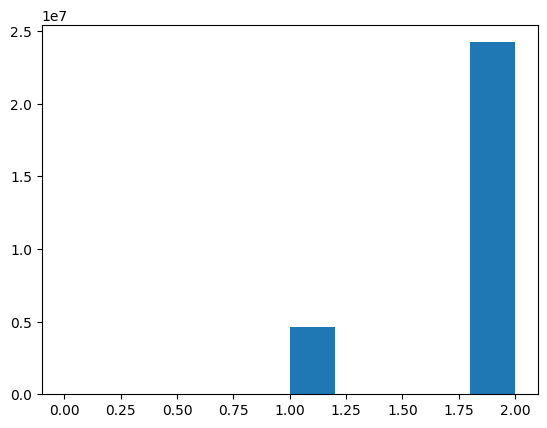

In [13]:
import matplotlib.pyplot as plt 
plt.hist( df['DEATH'])
plt.show()

In [14]:
df['DEATH'].fillna(0, inplace=True)

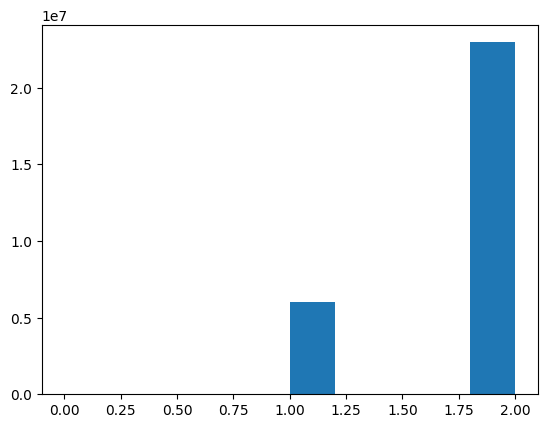

In [15]:
plt.hist( df['DISABILITY'])
plt.show()

In [16]:
df['DISABILITY'].fillna(0, inplace=True)

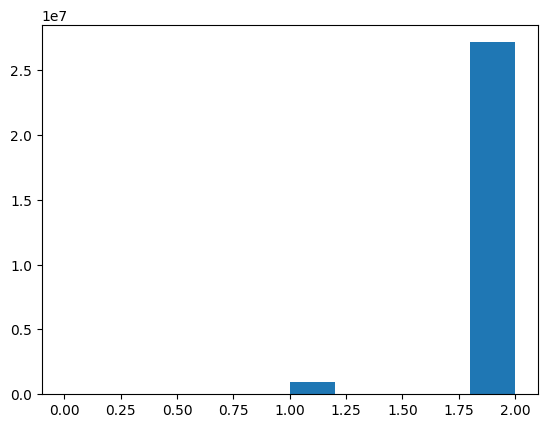

In [17]:
plt.hist( df['CONGENITAL_ANOMALY'])
plt.show()

In [18]:
df['CONGENITAL_ANOMALY'].fillna(0, inplace=True)

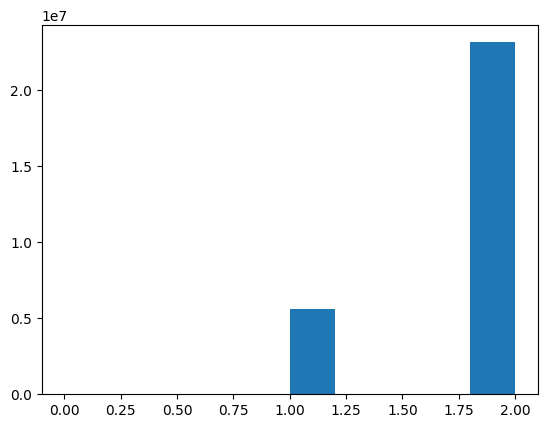

In [19]:
plt.hist( df['LIFE_THREATENING'])
plt.show()

In [20]:
df['LIFE_THREATENING'].fillna(0, inplace=True)

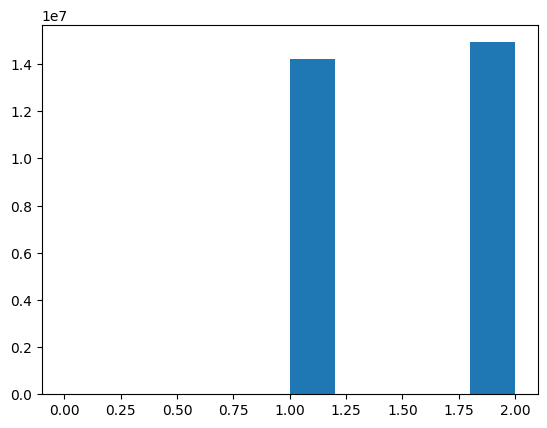

In [21]:
plt.hist( df['HOSP_REQUIRED'])
plt.show()

In [22]:
df['HOSP_REQUIRED'].fillna(0, inplace=True)

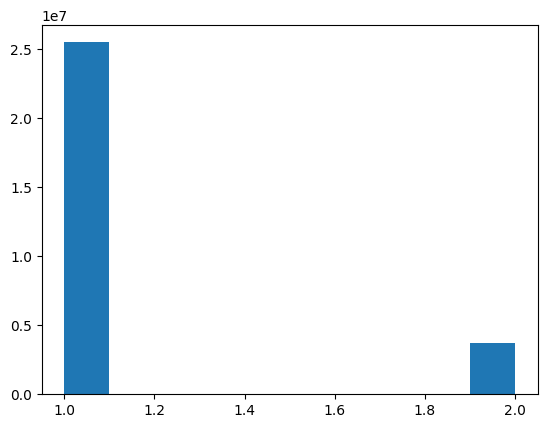

In [23]:
plt.hist( df['OTHER_MEDICALLY_IMP_COND'])
plt.show()

In [24]:
df['OTHER_MEDICALLY_IMP_COND'].fillna(0, inplace=True)

In [25]:
df['SOC_NAME_FR'] = df['SOC_NAME_FR'].str.replace('Ã©', 'e')
df['SOC_NAME_FR'] = df['SOC_NAME_FR'].str.replace('Ã¨', 'e')
df['SOC_NAME_FR'] = df['SOC_NAME_FR'].str.replace('Ã«', 'e')
df['SOC_NAME_FR'] = df['SOC_NAME_FR'].str.replace('Ã¯', 'i')
df['SOC_NAME_FR'] = df['SOC_NAME_FR'].str.replace('Ã', 'a')

In [26]:
df['PT_NAME_FR'] = df['PT_NAME_FR'].str.replace('Ã©', 'e')
df['PT_NAME_FR'] = df['PT_NAME_FR'].str.replace('Ã¨', 'e')
df['PT_NAME_FR'] = df['PT_NAME_FR'].str.replace('Ã«', 'e')
df['PT_NAME_FR'] = df['PT_NAME_FR'].str.replace('Ã¯', 'i')
df['PT_NAME_FR'] = df['PT_NAME_FR'].str.replace('Ã', 'a')

In [27]:
df.head()

,REPORT_ID,DATRECEIVED,GENDER_FR,AGE_Y,WEIGHT,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_FR,SERIOUSNESS_FR,DEATH,...,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,DRUGNAME,INDICATION_NAME_FR,PT_NAME_FR,SOC_NAME_FR,GENDER_FR_encoded,SERIOUSNESS_FR_encoded
0,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,1.0,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congenitales, familiales et genetiques",2.0,1
1,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,1.0,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Ventricule cerebral dilate,Affections du systeme nerveux,2.0,1
2,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,1.0,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysplasie septo-optique,"Affections congenitales, familiales et genetiques",2.0,1
3,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,1.0,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Holoprosencephalie,"Affections congenitales, familiales et genetiques",2.0,1
4,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,1.0,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congenitales, familiales et genetiques",2.0,1


In [28]:
df_medicament = df[['DRUGNAME', 'INDICATION_NAME_FR']]

# Éliminer les lignes en doublon
df_medicament = df_medicament.drop_duplicates()

# Réinitialiser l'index
df_medicament = df_medicament.reset_index(drop=True)
df_medicament['id_medicament'] = df_medicament.index + 1
df_medicament.head()

,DRUGNAME,INDICATION_NAME_FR,id_medicament
0,DICLECTIN,Nausées matinales de la grossesse,1
1,MOTRIN,Myosite,2
2,DICLECTIN,Produit utilisé pour une indication inconnue,3
3,PHENOBARBITAL,Produit utilisé pour une indication inconnue,4
4,DEPAKENE,Produit utilisé pour une indication inconnue,5


In [29]:
df_medicament.shape

(92201, 3)

In [31]:
df_merged = pd.merge(df, df_medicament, how='left', on=['DRUGNAME', 'INDICATION_NAME_FR'])
df_merged

,REPORT_ID,DATRECEIVED,GENDER_FR,AGE_Y,WEIGHT,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_FR,SERIOUSNESS_FR,DEATH,...,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,DRUGNAME,INDICATION_NAME_FR,PT_NAME_FR,SOC_NAME_FR,GENDER_FR_encoded,SERIOUSNESS_FR_encoded,id_medicament
0,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congenitales, familiales et genetiques",2.0,1,1
1,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Ventricule cerebral dilate,Affections du systeme nerveux,2.0,1,1
2,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysplasie septo-optique,"Affections congenitales, familiales et genetiques",2.0,1,1
3,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Holoprosencephalie,"Affections congenitales, familiales et genetiques",2.0,1,1
4,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congenitales, familiales et genetiques",2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29247310,907053728,31-JAN-24,Féminin,70.000,NaN,NaN,NaN,NaN,Grave,2.0,...,2.0,2.0,1.0,PREDNISONE,Produit utilisé pour une indication inconnue,Fracture de cheville,"Lesions, intoxications et complications d'inte...",2.0,1,175
29247311,907053728,31-JAN-24,Féminin,70.000,NaN,NaN,NaN,NaN,Grave,2.0,...,2.0,2.0,1.0,VITAMIN A,Produit utilisé pour une indication inconnue,Fracture de cheville,"Lesions, intoxications et complications d'inte...",2.0,1,9866
29247312,907053730,31-JAN-24,Féminin,19.000,NaN,NaN,NaN,NaN,Grave,2.0,...,2.0,2.0,1.0,OCRELIZUMAB,Sclérose en plaques rémittente-récurrente,Trouble uterin,Affections des organes de reproduction et du sein,2.0,1,11527
29247313,907053734,31-JAN-24,Féminin,46.000,NaN,Kilogramme,NaN,NaN,Non grave,2.0,...,2.0,2.0,2.0,PRAVASTATIN,Produit utilisé pour une indication inconnue,Myalgie,Affections musculosquelettiques et du tissu co...,2.0,2,6347


In [34]:
df_effet_secondaire = df[['PT_NAME_FR','SOC_NAME_FR']]

# Éliminer les lignes en doublon
df_effet_secondaire = df_effet_secondaire.drop_duplicates()

# Réinitialiser l'index
df_effet_secondaire = df_effet_secondaire.reset_index(drop=True)
df_effet_secondaire['id_effet_secondaire'] = df_effet_secondaire.index + 1
df_effet_secondaire.head()

,PT_NAME_FR,SOC_NAME_FR,id_effet_secondaire
0,Dysmorphie,"Affections congenitales, familiales et genetiques",1
1,Ventricule cerebral dilate,Affections du systeme nerveux,2
2,Dysplasie septo-optique,"Affections congenitales, familiales et genetiques",3
3,Holoprosencephalie,"Affections congenitales, familiales et genetiques",4
4,Enterite,Affections gastro-intestinales,5


In [35]:
df_merged_2 = pd.merge(df_merged, df_effet_secondaire, how='left', on=['PT_NAME_FR','SOC_NAME_FR'])
df_merged_2

,REPORT_ID,DATRECEIVED,GENDER_FR,AGE_Y,WEIGHT,WEIGHT_UNIT_FR,HEIGHT,HEIGHT_UNIT_FR,SERIOUSNESS_FR,DEATH,...,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,DRUGNAME,INDICATION_NAME_FR,PT_NAME_FR,SOC_NAME_FR,GENDER_FR_encoded,SERIOUSNESS_FR_encoded,id_medicament,id_effet_secondaire
0,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congenitales, familiales et genetiques",2.0,1,1,1
1,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Ventricule cerebral dilate,Affections du systeme nerveux,2.0,1,1,2
2,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysplasie septo-optique,"Affections congenitales, familiales et genetiques",2.0,1,1,3
3,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Holoprosencephalie,"Affections congenitales, familiales et genetiques",2.0,1,1,4
4,120066,09-NOV-98,Féminin,0.073,NaN,Kilogramme,68.0,Centimètres,Grave,0.0,...,0.0,0.0,DICLECTIN,Nausées matinales de la grossesse,Dysmorphie,"Affections congenitales, familiales et genetiques",2.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29247310,907053728,31-JAN-24,Féminin,70.000,NaN,NaN,NaN,NaN,Grave,2.0,...,2.0,1.0,PREDNISONE,Produit utilisé pour une indication inconnue,Fracture de cheville,"Lesions, intoxications et complications d'inte...",2.0,1,175,1189
29247311,907053728,31-JAN-24,Féminin,70.000,NaN,NaN,NaN,NaN,Grave,2.0,...,2.0,1.0,VITAMIN A,Produit utilisé pour une indication inconnue,Fracture de cheville,"Lesions, intoxications et complications d'inte...",2.0,1,9866,1189
29247312,907053730,31-JAN-24,Féminin,19.000,NaN,NaN,NaN,NaN,Grave,2.0,...,2.0,1.0,OCRELIZUMAB,Sclérose en plaques rémittente-récurrente,Trouble uterin,Affections des organes de reproduction et du sein,2.0,1,11527,173
29247313,907053734,31-JAN-24,Féminin,46.000,NaN,Kilogramme,NaN,NaN,Non grave,2.0,...,2.0,2.0,PRAVASTATIN,Produit utilisé pour une indication inconnue,Myalgie,Affections musculosquelettiques et du tissu co...,2.0,2,6347,71


In [36]:
df_final=df_merged_2.drop_duplicates()

In [38]:
df_patient=df_final[['REPORT_ID','DATRECEIVED','GENDER_FR_encoded','AGE_Y','WEIGHT','HEIGHT','SERIOUSNESS_FR_encoded','DEATH','DISABILITY','CONGENITAL_ANOMALY','LIFE_THREATENING','HOSP_REQUIRED','OTHER_MEDICALLY_IMP_COND','id_medicament','id_effet_secondaire']]
df_patient.head()

,REPORT_ID,DATRECEIVED,GENDER_FR_encoded,AGE_Y,WEIGHT,HEIGHT,SERIOUSNESS_FR_encoded,DEATH,DISABILITY,CONGENITAL_ANOMALY,LIFE_THREATENING,HOSP_REQUIRED,OTHER_MEDICALLY_IMP_COND,id_medicament,id_effet_secondaire
0,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,1
1,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,2
2,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,3
3,120066,09-NOV-98,2.0,0.073,NaN,68.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1,4
8,122262,04-SEP-09,2.0,36.000,NaN,153.0,1,0.0,1.0,0.0,0.0,0.0,0.0,2,5


In [39]:
df_patient.to_csv('df_patient.csv', index=False)
df_medicament.to_csv('df_medicament.csv', index=False)
df_effet_secondaire.to_csv('df_effet_secondaire.csv', index=False)